In [1]:
# Initialization cell
path_data = 'path\\to\\data'

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from preprocess import clean_corpora
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [3]:
# Import CSV data
df_all = pd.read_csv(path_all)
df_all['all_texts'] = df_all['title'] + df_all['short_description'] + df_all['need_statement'] + df_all['essay']
df_all = df_all.dropna(subset=['all_texts'])
df_all.dropna(axis=0, how='all', inplace=True)
print("Number of rows in data =", df_all.shape[0])
print("Number of columns in data =", df_all.shape[1])
df_2540 = df_all[(2500 <= df_all['all_texts'].apply(len)) & (df_all['all_texts'].apply(len) < 4000)]
df_2540.shape

C:\Users\under\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0
Number of rows in data = 1201597
Number of columns in data = 52


(229394, 52)

In [4]:
print(df_2540.shape)
df_2540 = df_2540.dropna(subset=['grade_level'])
df_2540 = df_2540.dropna(subset=['poverty_level'])
df_2540 = df_2540.dropna(subset=['primary_focus_area'])
print(df_2540.shape)

(229394, 52)
(229370, 52)


In [6]:
X_texts = clean_corpora(df_2540['all_texts'], 
                        isLower=True, 
                        doesRemoveDigit=True, 
                        doesRemovePunc=True, 
                        doesRemoveStopWords=True, 
                        doesLemmatize=True)
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2')
X = vectorizer.fit_transform(X_texts)

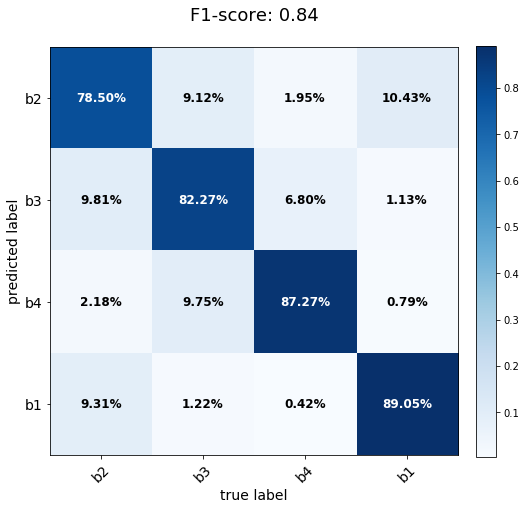

In [10]:
y = df_2540['grade_level']
X_train, X_test, y_train, y_test_g = train_test_split(X, y, test_size=0.2, random_state=42)

svc = LinearSVC(C=5.0, class_weight=None, dual=True, fit_intercept=True,
                intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
svc.fit(X_train, y_train)
pred_g = svc.predict(X_test)
f1 = f1_score(y_test_g, pred_g, average='macro', labels=np.unique(pred_g))

plot_confusion_matrix(conf_mat=confusion_matrix(y_test_g, pred_g)
                     ,show_absolute=False
                     ,show_normed=True
                     ,colorbar=True
                     ,class_names=['b2', 'b3', 'b4', 'b1']
                     ,figsize=(8, 8)
                     ,fontsize=12
                     ,font_bold=True)
plt.title('F1-score: ' + str(format(f1, '.2f')), fontsize=18)
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [11]:
Counter(y_test_g)

Counter({'Grades 9-12': 8198,
         'Grades 6-8': 8802,
         'Grades PreK-2': 14748,
         'Grades 3-5': 14126})

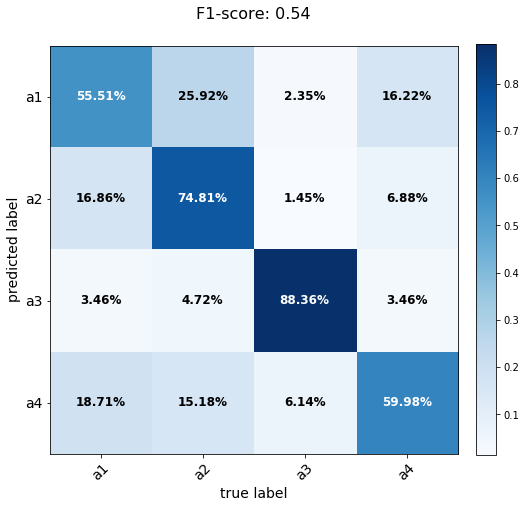

In [9]:
y = df_2540['poverty_level']
X_train, X_test, y_train, y_test_p = train_test_split(X, y, test_size=0.2, random_state=42)

svc = LinearSVC(C=5.0, class_weight=None, dual=True, fit_intercept=True,
                intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
svc.fit(X_train, y_train)
pred_p = svc.predict(X_test)
f1 = f1_score(y_test_p, pred_p, average='macro', labels=np.unique(pred_p))

plot_confusion_matrix(conf_mat=confusion_matrix(y_test_p, pred_p)
                     ,show_absolute=False
                     ,show_normed=True
                     ,colorbar=True
                     ,class_names=['a1', 'a2', 'a3', 'a4']
                     ,figsize=(8, 8)
                     ,fontsize=12
                     ,font_bold=True)
plt.title('F1-score: ' + str(format(f1, '.2f')), fontsize=16)
plt.xlabel('true label', fontsize=14)
plt.ylabel('predicted label', fontsize=14)
plt.xticks(fontsize=1)
plt.yticks(fontsize=14)
plt.show()

In [12]:
Counter(y_test_p)

Counter({'highest poverty': 27201,
         'moderate poverty': 6331,
         'high poverty': 11113,
         'low poverty': 1229})

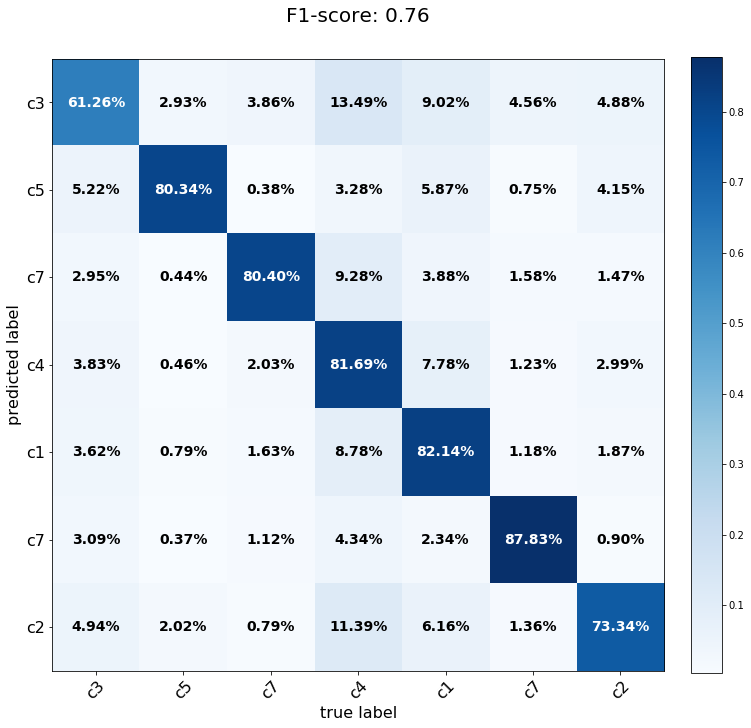

In [11]:
y = df_2540['primary_focus_area']
X_train, X_test, y_train, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42)

svc = LinearSVC(C=5.0, class_weight=None, dual=True, fit_intercept=True,
                intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
svc.fit(X_train, y_train)
pred_s = svc.predict(X_test)
f1 = f1_score(y_test_s, pred_s, average='macro', labels=np.unique(pred_s))

plot_confusion_matrix(conf_mat=confusion_matrix(y_test_s, pred_s)
                     ,show_absolute=False
                     ,show_normed=True
                     ,colorbar=True
                     ,class_names=['c3', 'c5', 'c7', 'c4', 'c1', 'c7', 'c2']
                     ,figsize=(12, 12)
                     ,fontsize=14
                     ,font_bold=True)
plt.title('F1-score: ' + str(format(f1, '.2f')), fontsize=20)
plt.xlabel('true label', fontsize=16)
plt.ylabel('predicted label', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [13]:
Counter(y_test_s)

Counter({'Math & Science': 12941,
         'Literacy & Language': 18472,
         'Applied Learning': 2977,
         'Music & The Arts': 4102,
         'Health & Sports': 1833,
         'History & Civics': 2249,
         'Special Needs': 3300})